### 0. Lib improt

In [164]:
#standard libs
import numpy as np
import pandas as pd

#visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#text analisys
import re

#model processing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

#geotools
from geopandas.tools import geocode
from haversine import haversine

#natural language processing
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

#values influence for model
from sklearn.feature_selection import f_classif #numeric values

#category encoding
import category_encoders as ce


In [111]:
nltk.downloader.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\nokac\AppData\Roaming\nltk_data...


True

In [143]:
!pip freeze > requirements.txt

### 1. Data import

In [2]:
hotels = pd.read_csv('data/hotels.csv')
hotels.head()

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,tags,days_since_review,lat,lng
0,Stratton Street Mayfair Westminster Borough Lo...,581,2/19/2016,8.4,The May Fair Hotel,United Kingdom,Leaving,3,1994,Staff were amazing,4,7,10.0,"[' Leisure trip ', ' Couple ', ' Studio Suite ...",531 day,51.507894,-0.143671
1,130 134 Southampton Row Camden London WC1B 5AF...,299,1/12/2017,8.3,Mercure London Bloomsbury Hotel,United Kingdom,poor breakfast,3,1361,location,2,14,6.3,"[' Business trip ', ' Couple ', ' Standard Dou...",203 day,51.521009,-0.123097
2,151 bis Rue de Rennes 6th arr 75006 Paris France,32,10/18/2016,8.9,Legend Saint Germain by Elegancia,China,No kettle in room,6,406,No Positive,0,14,7.5,"[' Leisure trip ', ' Solo traveler ', ' Modern...",289 day,48.845377,2.325643
3,216 Avenue Jean Jaures 19th arr 75019 Paris Fr...,34,9/22/2015,7.5,Mercure Paris 19 Philharmonie La Villette,United Kingdom,No Negative,0,607,Friendly staff quiet comfortable room spotles...,11,8,10.0,"[' Leisure trip ', ' Solo traveler ', ' Standa...",681 day,48.888697,2.394540
4,Molenwerf 1 1014 AG Amsterdam Netherlands,914,3/5/2016,8.5,Golden Tulip Amsterdam West,Poland,Torn sheets,4,7586,The staff was very friendly and helpful Break...,20,10,9.6,"[' Business trip ', ' Couple ', ' Standard Dou...",516 day,52.385601,4.847060


### 2. Data basic information

In [3]:
hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386803 entries, 0 to 386802
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               386803 non-null  object 
 1   additional_number_of_scoring                386803 non-null  int64  
 2   review_date                                 386803 non-null  object 
 3   average_score                               386803 non-null  float64
 4   hotel_name                                  386803 non-null  object 
 5   reviewer_nationality                        386803 non-null  object 
 6   negative_review                             386803 non-null  object 
 7   review_total_negative_word_counts           386803 non-null  int64  
 8   total_number_of_reviews                     386803 non-null  int64  
 9   positive_review                             386803 non-null  object 
 

In [4]:
hotels.describe(include = 'all')

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,tags,days_since_review,lat,lng
count,386803,386803.000000,386803,386803.000000,386803,386803,386803,386803.000000,386803.000000,386803,386803.000000,386803.00000,386803.000000,386803,386803,384355.000000,384355.000000
unique,1493,NaN,731,NaN,1492,225,248828,NaN,NaN,311737,NaN,NaN,NaN,47135,731,NaN,NaN
top,163 Marsh Wall Docklands Tower Hamlets London ...,NaN,8/2/2017,NaN,Britannia International Hotel Canary Wharf,United Kingdom,No Negative,NaN,NaN,No Positive,NaN,NaN,NaN,"[' Leisure trip ', ' Couple ', ' Double Room '...",1 days,NaN,NaN
freq,3587,NaN,1911,NaN,3587,184033,95907,NaN,NaN,26885,NaN,NaN,NaN,3853,1911,NaN,NaN
mean,NaN,498.246536,NaN,8.397231,NaN,NaN,NaN,18.538988,2743.992042,NaN,17.776985,7.17725,8.396906,NaN,NaN,49.443522,2.823402
std,NaN,500.258012,NaN,0.547881,NaN,NaN,NaN,29.703369,2316.457018,NaN,21.726141,11.05442,1.636090,NaN,NaN,3.466936,4.579043
min,NaN,1.000000,NaN,5.200000,NaN,NaN,NaN,0.000000,43.000000,NaN,0.000000,1.00000,2.500000,NaN,NaN,41.328376,-0.369758
25%,NaN,169.000000,NaN,8.100000,NaN,NaN,NaN,2.000000,1161.000000,NaN,5.000000,1.00000,7.500000,NaN,NaN,48.214662,-0.143649
50%,NaN,342.000000,NaN,8.400000,NaN,NaN,NaN,9.000000,2134.000000,NaN,11.000000,3.00000,8.800000,NaN,NaN,51.499981,-0.000250
75%,NaN,660.000000,NaN,8.800000,NaN,NaN,NaN,23.000000,3613.000000,NaN,22.000000,8.00000,9.600000,NaN,NaN,51.516288,4.834443


### 3. Data transform

In [146]:
cat_columns = []
columns_to_drop = []


#### 3.1 Date (review_date)

In [6]:
hotels['review_date'] = pd.to_datetime(hotels['review_date'], format='%m/%d/%Y')

In [7]:
display(hotels['review_date'].min().date())
display(hotels['review_date'].max().date())

datetime.date(2015, 8, 4)

datetime.date(2017, 8, 3)

#### 3.2 Days since review (days_since_review) in complex with review date

In [8]:
def review_days(input_string):
    """String to integer transformation for amount of days

    Args:
        input_string (string): string with information

    Returns:
        int: days
    """
    return int(input_string.split(' ')[0])

In [9]:
hotels['days_since_review_int'] = hotels['days_since_review'].apply(review_days)

In [10]:
display(hotels['days_since_review_int'].min())
display(hotels['days_since_review_int'].max())

0

730

In [147]:
#hotels.drop(labels = 'days_since_review', axis = 1, inplace = True)
columns_to_drop.append('days_since_review')

Day is minimal integer digit for our data. So, lets see, is there any anomalies in this scale.   
We have 730 days - two years.

Text(0, 0.5, 'Amount of rewiews')

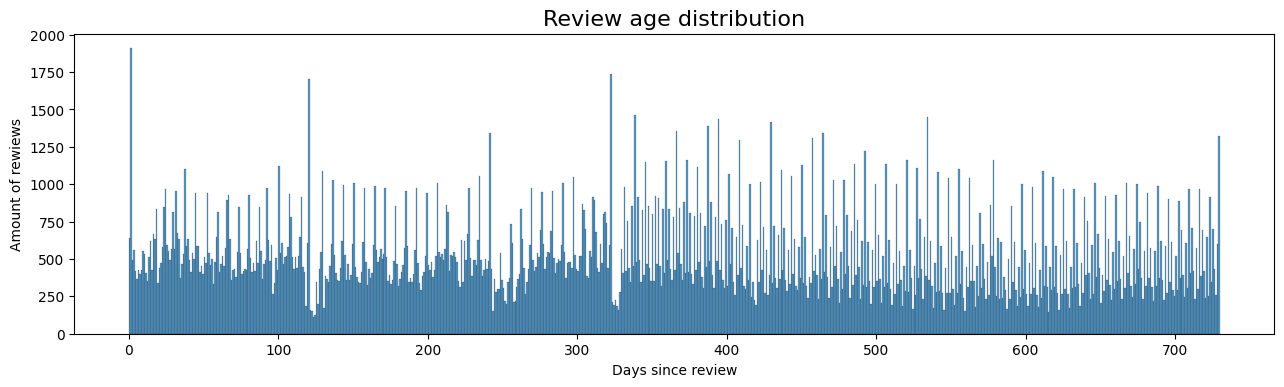

In [12]:
fig = plt.figure(figsize=(12, 3))
axes = fig.add_axes((1, 1, 1, 1))

histplot = sns.histplot(
    data = hotels,
    x='days_since_review_int', 
    bins=730,
    ax=axes,
)
histplot.set_title('Review age distribution', fontsize=16)
histplot.set_xlabel('Days since review')
histplot.set_ylabel('Amount of rewiews')

Text(0, 0.5, 'Amount of rewiews')

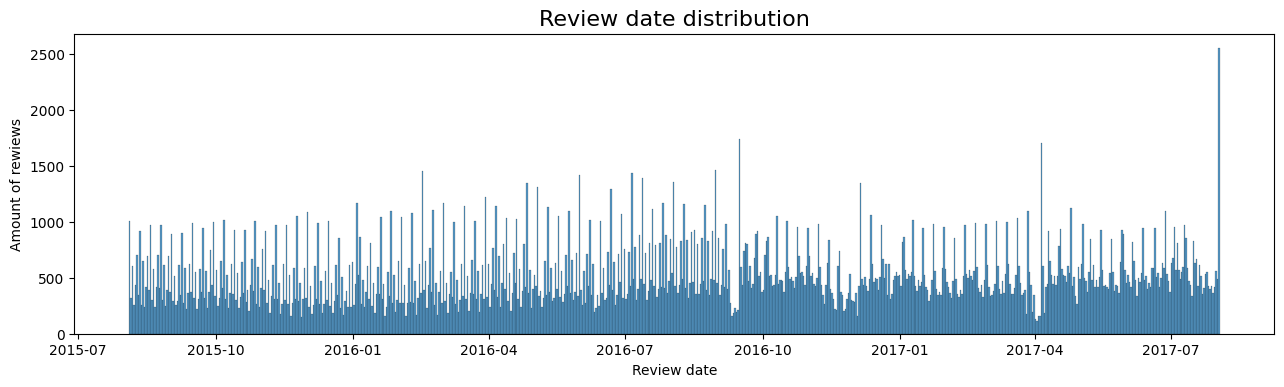

In [13]:
fig = plt.figure(figsize=(12, 3))
axes = fig.add_axes((1, 1, 1, 1))

histplot = sns.histplot(
    data = hotels,
    x='review_date', 
    bins=730,
    ax=axes,
)
histplot.set_title('Review date distribution', fontsize=16)
histplot.set_xlabel('Review date')
histplot.set_ylabel('Amount of rewiews')

In [14]:
hotels['review_day'] = hotels['review_date'].dt.day_name()

The day of the week with Monday=0, Sunday=6.

In [15]:
review_day_groups = hotels.groupby('review_day', as_index = False).agg({
    'hotel_address': 'count'
}).rename(columns = {
    'review_day': 'day',
    'hotel_address': 'review_count'
})
review_day_groups

,day,review_count
0,Friday,33447
1,Monday,60726
2,Saturday,38923
3,Sunday,63036
4,Thursday,55861
5,Tuesday,90954
6,Wednesday,43856


Text(0, 0.5, 'Amount of rewiews')

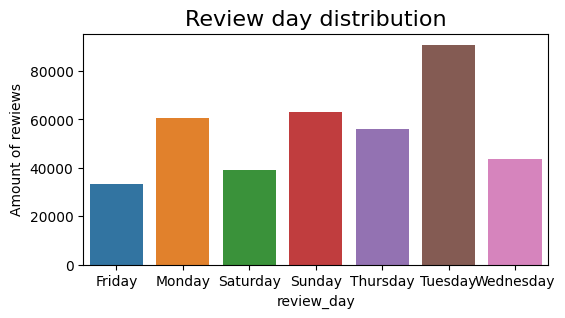

In [16]:
fig = plt.figure(figsize=(6, 3))
barplot = sns.barplot(
    data=review_day_groups,
    x = 'day',
    y = 'review_count'
    )
barplot.set_title('Review day distribution', fontsize=16)
barplot.set_xlabel('review_day')
barplot.set_ylabel('Amount of rewiews')

Day of week seems like important parameter.

In [148]:
cat_columns.append('review_day')

In [18]:
hotels['review_month'] = hotels['review_date'].dt.month 

In [19]:
review_month_groups = hotels.groupby('review_month', as_index = False).agg({
    'hotel_address': 'count'
}).rename(columns = {
    'review_month': 'month',
    'hotel_address': 'review_count'
})
review_month_groups.sort_values(by = 'review_count', ascending = False)

,month,review_count
7,8,37911
6,7,37141
4,5,34684
9,10,32972
5,6,32226
3,4,32213
8,9,31798
0,1,31512
2,3,30901
11,12,29713


Text(0, 0.5, 'Amount of rewiews')

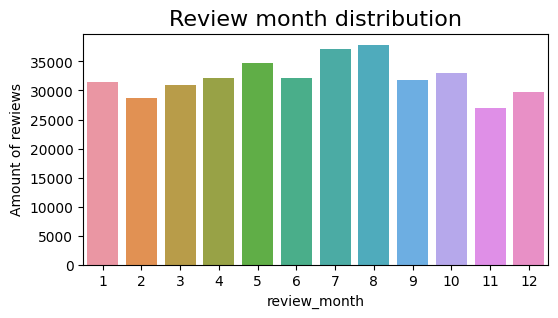

In [20]:
fig = plt.figure(figsize=(6, 3))
barplot = sns.barplot(
    data = review_month_groups,
    x = 'month',
    y = 'review_count'
    )
barplot.set_title('Review month distribution', fontsize=16)
barplot.set_xlabel('review_month')
barplot.set_ylabel('Amount of rewiews')

In [21]:
hot_months = list(review_month_groups.sort_values(by = 'review_count', ascending = False)['month'].nlargest(4))

In [22]:
hotels['hot_month'] = hotels['review_month'].apply(lambda x: True if x in hot_months else False)

In [23]:
hotels['hot_month'].value_counts()

False    265323
True     121480
Name: hot_month, dtype: int64

In [149]:
#hotels.drop(labels = 'review_month', axis = 1, inplace = True)
#hotels.drop(labels = 'review_date', axis = 1, inplace = True)
#hotels.drop(labels = 'days_since_review_int', axis = 1, inplace = True)
columns_to_drop.extend(['review_month', 'review_date', 'days_since_review_int'])

#### 3.3 Hotel names (hotel_name) combined with hotel address (hotel_address)

In [25]:
hotels['hotel_name'].nunique()

1492

In [26]:
hotels['hotel_address'].nunique()

1493

In [27]:
hotels.groupby('hotel_name', as_index = False)['hotel_address'].agg('nunique').sort_values(by = 'hotel_address', ascending = False)

,hotel_name,hotel_address
741,Hotel Regina,3
0,11 Cadogan Gardens,1
992,Mercure Paris Gare Montparnasse,1
1001,Mercure Paris Pigalle Sacre Coeur,1
1000,Mercure Paris Opera Louvre,1
...,...,...
494,Ham Yard Hotel,1
493,Hallmark Hotel London Chigwell Prince Regent,1
492,HCC St Moritz,1
491,HCC Regente,1


In [28]:
hotels.groupby('hotel_address', as_index = False)['hotel_name'].agg('nunique').sort_values(by = 'hotel_name', ascending = False)

,hotel_address,hotel_name
722,8 Northumberland Avenue Westminster Borough Lo...,2
992,Hernalser Hauptstra e 105 17 Hernals 1170 Vien...,1
1001,Hoffingergasse 26 28 12 Meidling 1120 Vienna A...,1
1000,Hobbemakade 50 Oud Zuid 1071 XL Amsterdam Neth...,1
999,Hintschiggasse 1 10 Favoriten 1100 Vienna Austria,1
...,...,...
494,39 Avenue de l Op ra 2nd arr 75002 Paris France,1
493,39 Avenue de Wagram 17th arr 75017 Paris France,1
492,39 40 Dorset Square Hotel Westminster Borough ...,1
491,39 40 Cleveland Square Westminster Borough Lon...,1


Bingo! 3 hotels with a same name, and two hotels with a same address. We need some proper ID for our objects.

In [29]:
hotels['hotel_descripton'] = hotels['hotel_name'] + ' ' + hotels['hotel_address']
hotels['hotel_descripton'].nunique()

1494

In [150]:
#hotels['hotel_descripton'] = hotels['hotel_descripton'].astype('category')

#hotels['hotel_descripton'] = hotels['hotel_descripton'].cat.rename_categories(np.arange(1, 1495))

cat_columns.append('hotel_descripton')

Now lets try to mine some more data from address.

In [31]:
hotels['hotel_address'].head(10)

0    Stratton Street Mayfair Westminster Borough Lo...
1    130 134 Southampton Row Camden London WC1B 5AF...
2     151 bis Rue de Rennes 6th arr 75006 Paris France
3    216 Avenue Jean Jaures 19th arr 75019 Paris Fr...
4            Molenwerf 1 1014 AG Amsterdam Netherlands
5                   Via Mecenate 121 20138 Milan Italy
6    97 Cromwell Road Kensington and Chelsea London...
7    Josefsgasse 4 6 08 Josefstadt 1080 Vienna Austria
8    190 Queen s Gate Kensington and Chelsea London...
9    Holland Park Avenue Kensington and Chelsea Lon...
Name: hotel_address, dtype: object

In [32]:
def hotel_country_city(input_string):
    """Function to transform full address to pair "country-city". Developed for specific dataset

    Args:
        input_string (string): Address, full

    Returns:
        string, string: tuple containing country name and city name
    """
    data = input_string.split(' ')
    if data[-1] == 'Kingdom':
        return data[-2] + ' ' + data[-1], data[-5]
    else:
        return data[-1], data[-2]

In [33]:
country_city = hotels['hotel_address'].apply(hotel_country_city)

country_city.value_counts()

(United Kingdom, London)    196774
(Spain, Barcelona)           45132
(France, Paris)              44830
(Netherlands, Amsterdam)     43006
(Austria, Vienna)            29178
(Italy, Milan)               27883
Name: hotel_address, dtype: int64

We have certain pairs for country and city. Let`s keep city name only.

In [34]:
def hotel_city(input_string):
    """Function to transform full address to city. Developed for specific dataset. Simplified.

    Args:
        input_string (string): Address, full

    Returns:
        string: city name
    """
    data = input_string.split(' ')
    if data[-1] == 'Kingdom':
        return data[-5]
    else:
        return data[-2]

In [35]:
hotels['hotel_city'] = hotels['hotel_address'].apply(hotel_city)
hotels['hotel_city'].value_counts()

London       196774
Barcelona     45132
Paris         44830
Amsterdam     43006
Vienna        29178
Milan         27883
Name: hotel_city, dtype: int64

In [151]:
#hotels['hotel_city'] = hotels['hotel_city'].astype('category')
cat_columns.append('hotel_city')

In [152]:
#hotels.drop(labels = 'hotel_address', axis = 1, inplace = True)
#hotels.drop(labels = 'hotel_name', axis = 1, inplace = True)
columns_to_drop.extend(['hotel_address', 'hotel_name'])

#### 3.4 Nationality (reviewer_nationality)

In [38]:
hotels['reviewer_nationality'].nunique()

225

Way too much. Lets try to make it less.

In [39]:
hotels['reviewer_nationality'].value_counts(normalize = True).nlargest(51).sum()

0.9513654237428353

In [40]:
popular_nations = hotels['reviewer_nationality'].value_counts().nlargest(51).index
hotels['rev_nation_short'] = hotels['reviewer_nationality'].apply(lambda x: x if x in popular_nations else 'Other')
hotels['rev_nation_short'] = hotels['rev_nation_short'].apply(lambda x: x.strip())

#display(hotels['rev_nation_short'].value_counts(normalize = True))

#hotels['rev_nation_short'] = hotels['rev_nation_short'].astype('category')

In [153]:
#hotels.drop(labels = 'reviewer_nationality', axis = 1, inplace = True)
cat_columns.append('rev_nation_short')
columns_to_drop.append('reviewer_nationality')

#### 3.5 Tags (tags)

In [42]:
def tag_split(input_string):
    """Function to transform string with tags into set of tags without useless symbols

    Args:
        input_string (string): string of tags with useless symbols
    Returns:
        float: _NaN for empty cells
        set: set of tags
    """
    if (input_string is np.nan):
        return np.nan
    
    tag_list = input_string[1:-1].lower().split(',')
    for i,tag in enumerate(tag_list):
        tag_list[i] = tag.strip().replace('\'','').strip()
    
    return set(tag_list)

In [43]:
Tags = hotels['tags'].apply(tag_split)
tag_set= set()
for tag in Tags:
    tag_set.update(tag)
print('Overall tags:',len(tag_set))

Overall tags: 2361


In [44]:
tag_dict = dict.fromkeys(tag_set)

for tag_string in hotels['tags']:
    for item in tag_split(tag_string):
        if tag_dict[item] is None:
            tag_dict[item] = 1
        else:
            tag_dict[item] += 1

sorted(tag_dict.items(), key = lambda x: x[1], reverse = True)[0]

('leisure trip', 313593)

In [45]:
sorted_tags = sorted(tag_dict.items(), key = lambda x: x[1], reverse = True)

In [46]:
display(sorted_tags)

[('leisure trip', 313593),
 ('submitted from a mobile device', 230778),
 ('couple', 189212),
 ('stayed 1 night', 145373),
 ('stayed 2 nights', 100263),
 ('solo traveler', 81235),
 ('stayed 3 nights', 72000),
 ('business trip', 61989),
 ('group', 49088),
 ('family with young children', 45836),
 ('stayed 4 nights', 35748),
 ('double room', 26386),
 ('standard double room', 24151),
 ('superior double room', 23550),
 ('family with older children', 19802),
 ('deluxe double room', 18623),
 ('double or twin room', 16824),
 ('stayed 5 nights', 15611),
 ('standard double or twin room', 13062),
 ('classic double room', 12716),
 ('superior double or twin room', 10238),
 ('2 rooms', 9287),
 ('stayed 6 nights', 7399),
 ('standard twin room', 7325),
 ('single room', 7227),
 ('twin room', 6279),
 ('stayed 7 nights', 5549),
 ('executive double room', 4763),
 ('classic double or twin room', 4576),
 ('superior twin room', 4540),
 ('club double room', 4485),
 ('deluxe double or twin room', 4474),
 ('quee

##### 3.5.1 Stayed nights

In [47]:
hotels['nights_stayed'] = hotels['tags'].apply(lambda x: int(x.lower().split(' ')[x.lower().split(' ').index('stayed') + 1]) if 'stayed' in x.lower().split(' ') else 1)

Text(0, 0.5, 'Amount of rewiews')

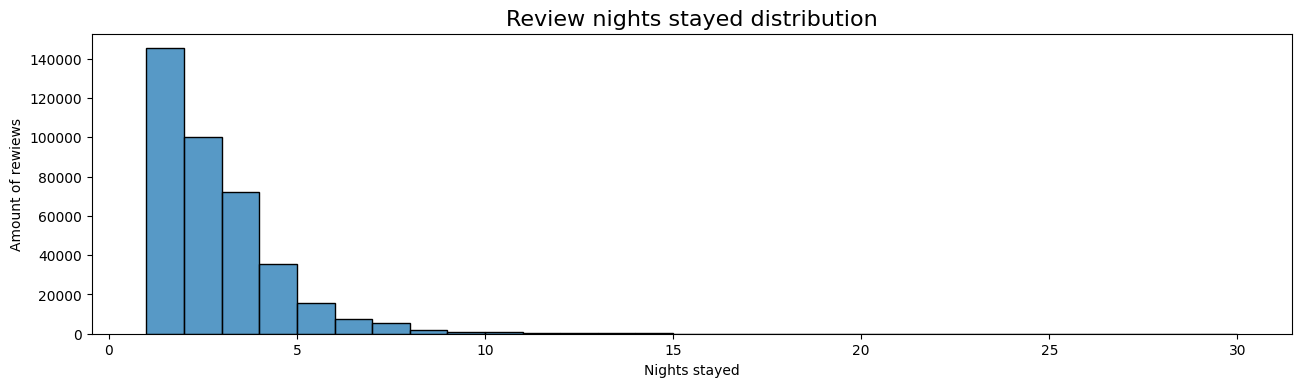

In [48]:
fig = plt.figure(figsize=(12, 3))
axes = fig.add_axes((1, 1, 1, 1))

histplot = sns.histplot(
    data = hotels,
    x='nights_stayed', 
    bins=29,
    ax=axes,
)
histplot.set_title('Review nights stayed distribution', fontsize=16)
histplot.set_xlabel('Nights stayed')
histplot.set_ylabel('Amount of rewiews')

##### 3.5.2 Pets

In [49]:
pet_tags = []
for pair in sorted_tags:
    if ('pet' in pair[0]) and ('petite' not in pair[0]):
        pet_tags.append(pair)
        
display(pet_tags)

[('with a pet', 1045)]

In [50]:
def pet_func(input_string):
    """Function to detect pet in visiters groups.

    Args:
        input_string (string): All tags from review

    Returns:
        bool: Pet status
    """
    for pair in pet_tags:
        if pair[0] in input_string.lower():
            return True #with pet
    return False #without pet

In [51]:
hotels['with_pet'] = hotels['tags'].apply(pet_func)

##### 3.5.3 Trip type

In [52]:
trip_tags = []
for pair in sorted_tags:
    if 'trip' in pair[0] and 'triple' not in pair[0]:
        trip_tags.append(pair)
        
display(trip_tags)

[('leisure trip', 313593), ('business trip', 61989)]

Let`s focus on simple question - was reviewers trip business or not?

In [53]:
def trip_func(input_string):
    """Function to detect trip type

    Args:
        input_string (string): All tags from review

    Returns:
        int: trip type - 1 for leisure, 0 for business, 2 to unknown
    """
    if trip_tags[0][0] in input_string.lower():
        return False
    elif trip_tags[1][0] in input_string.lower():
        return True
    else:
        return False

In [54]:
hotels['trip_type'] = hotels['tags'].apply(trip_func)

In [55]:
hotels['trip_type'].value_counts()

False    324814
True      61989
Name: trip_type, dtype: int64

##### 3.5.4 From mobile

In [56]:
mobile_tags = []
for pair in sorted_tags:
    if 'mobile device' in pair[0]:
        mobile_tags.append(pair)
        
display(mobile_tags)

[('submitted from a mobile device', 230778)]

In [57]:
def mobile_func(input_string):
    """Function to detect review from mobile device

    Args:
        input_string (string): All tags from review

    Returns:
        bool: From mobile device or not
    """
    for pair in mobile_tags:
        if pair[0] in input_string.lower():
            return True #review from mobile device
    return False

In [58]:
hotels['from_mobile'] = hotels['tags'].apply(mobile_func)

##### 3.5.5 Room capacity and class

In [59]:
def child_search(input_string):
    """Function to collect givel amount of children from tags

    Args:
        input_string (string): All tags from review

    Returns:
        int: amount of children
    """
    target = re.findall(r'\d [cC]hildren', input_string)
    if len(target) > 0:
        return int(target[-1][0])
    if 'children' in input_string:
        return 1
    return 0   

In [60]:
#classification of room capacity except additional children beds
room_capacity = [
    ['unknown'],
    ['single', 'solo'],
    ['double', 'twin', 'couple', '2 rooms', 'two'],
    ['family', 'triple'],
    ['two bedroom', 'travelers with friends']
    ]

In [61]:
def capacity_func(input_string):
    j = 0
    for i, cap in enumerate(room_capacity):
        for type in cap:
            if type in input_string.lower():
                j = i
    if 'children' in input_string.lower():
        j = 2 + child_search(input_string)
    if 'group' in input_string.lower():
        j = 2 #most of tags has 2 rooms or standard room        
    return j

In [62]:
hotels['room_capacity'] = hotels['tags'].apply(capacity_func)

In [63]:
hotels['room_capacity'].value_counts(dropna = False)

2    288600
3     65796
1     29589
4      2799
5        19
Name: room_capacity, dtype: int64

In [64]:
#room class classification
room_class = [
    ['unknown'],
    ['compact', 'economy', 'small', 'queen', 'camper', 'mini', 'bunk bed'],
    ['basic', 'classic', 'studio', 'standard', 'ordinary', 'city', 'classique'],
    ['superior', 'comfort', 'club', 'modern', 'art', 'king', 'wonderful', 'view', 'loft', 'panoramic', 'cosy', 'intuition', 'fabulous', 'mega', 'cool corner', 'ambassador',
     'cozy', 'emotion', 'large'],
    ['executive', 'hilton', 'romantic', 'special', 'business', 'garden', 'spectacular', 'atrium', 'sensation', 'terrace', 'prestige'],
    ['maisonette', 'penthouse', 'privilege', 'penta', 'premier', 'premium', 'mandarin', 'suite', 'deluxe', 'luxury']
    ]

In [65]:
def class_func(input_string):
    """Function to encode room class

    Args:
        input_string (string): All tags from review

    Returns:
        int: room class code
    """
    j = 0
    for i, cap in enumerate(room_class):
        for type in cap:
            if type in input_string.lower():
                j = i  
    if j == 0:
        j = 2 #for atomised types
    return j

In [66]:
hotels['room_class'] = hotels['tags'].apply(class_func)

In [67]:
hotels['room_class'].value_counts(dropna = False)

2    154800
3     82018
4     69169
5     67390
1     13426
Name: room_class, dtype: int64

Thats all we could get from tags. Time to say goodbuy!

In [154]:
columns_to_drop.append('tags')

#### 3.6 Latitude/longitude (lat/lng)
As far as we have city name for all entities, we can calculate distance between city center and hotel - it seems like important parameter for travelers.   
Before this calculation, we can fill emply cells with special librarys Geopy and Geopandas.

In [70]:
lat_list = list(hotels[hotels['lat'].isnull()].groupby('hotel_name', as_index = False)['lat'].mean()['hotel_name'])

In [71]:
lat_df = geocode(lat_list, provider = 'nominatim', user_agent = 'my_request')

In [72]:
lat_df['hotel_name'] = lat_list

In [73]:
lat_df

,geometry,address,hotel_name
0,POINT EMPTY,None,Austria Trend Hotel Schloss Wilhelminenberg Wien
1,POINT EMPTY,None,City Hotel Deutschmeister
2,POINT (16.35143 48.20966),"Cordial Theaterhotel, 22, Josefstädter Straße,...",Cordial Theaterhotel Wien
3,POINT EMPTY,None,Derag Livinghotel Kaiser Franz Joseph Vienna
4,POINT EMPTY,None,Fleming s Selection Hotel Wien City
5,POINT (2.34366 48.87157),"Holiday Inn Paris Opéra, Boulevard Poissonnièr...",Holiday Inn Paris Montmartre
6,POINT (84.89058 27.91122),"Bhairab Hotel and Lodge, Dhading Besi Marga, F...",Hotel Advance
7,POINT (4.35441 50.85207),"Hôtel Atlanta, Passage du Nord - Noorddoorgang...",Hotel Atlanta
8,POINT (16.37992 48.21357),"Hotel City-Central, 8, Taborstraße, Karmeliter...",Hotel City Central
9,POINT (16.38385 48.18886),"Daniel, 5, Landstraßer Gürtel, Fasanviertel, K...",Hotel Daniel Vienna


In [74]:
lat_df_points = lat_df.drop(labels = [0, 1, 3, 4, 6, 7, 10, 11, 12, 13], axis = 0).reset_index(drop=True)

In [75]:
for index, raw in lat_df_points.iterrows():
    
    hotels.loc[(hotels.hotel_name == lat_df_points.hotel_name.iloc[index]), ('lat', 'lng')] = (lat_df_points.geometry.iloc[index].y,lat_df_points.geometry.iloc[index].x) 

Not all of empty cell were filled. We can fill empty distance between hotel and city cells center after calculation with median for the current city.

In [76]:
cities_center = {
    'London': (51.509865, -0.118092),
    'Paris': (48.864716, 2.349014),
    'Milan': (45.464664, 9.188540),
    'Amsterdam': (52.379189, 4.899431),
    'Barcelona': (41.390205, 2.154007),
    'Vienna': (48.210033, 16.363449)
    }

In [77]:
def dist_to_city_center(lat, lng, city):
    """Function to calculate distance to city center from point with current coordinates

    Args:
        lat (float): Latitude, decimal degree
        lng (float): longitude, decimal degree
        city (string): City name

    Returns:
        float: distance, km
    """
    if city in cities_center.keys():
        dist = haversine(cities_center[city], (lat, lng))
    else:
        dist = np.nan
    return dist

In [78]:
hotels['dist_to_city_center'] = hotels.apply(lambda x: dist_to_city_center(x['lat'], x['lng'], x['hotel_city']), axis = 1)

In [84]:
mask1 = hotels['dist_to_city_center'].isnull()
for index, raw in hotels[mask1].iterrows():
    mask2 = hotels['hotel_city'] == raw.hotel_city
    hotels.loc[index, 'dist_to_city_center'] = hotels[mask2]['dist_to_city_center'].median()

Text(0, 0.5, 'Amount of rewiews')

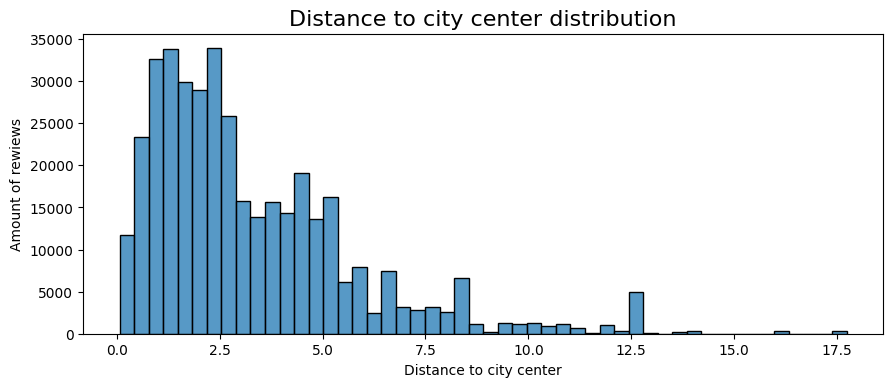

In [89]:
fig = plt.figure(figsize=(8, 3))
axes = fig.add_axes((1, 1, 1, 1))

histplot = sns.histplot(
    data = hotels,
    x='dist_to_city_center', 
    bins=50,
    ax=axes,
)
histplot.set_title('Distance to city center distribution', fontsize=16)
histplot.set_xlabel('Distance to city center')
histplot.set_ylabel('Amount of rewiews')

In [155]:
columns_to_drop.extend(['lat', 'lng'])

#### 3.7 Positive and negative reviews (positive_review/negative_review)
First, we need to examine most common values.

In [93]:
hotels['negative_review_sl'] = hotels['negative_review'].apply(lambda x: x.lower().strip())

In [97]:
hotels['negative_review_sl'].value_counts().nlargest(30)

no negative                  95907
nothing                      15882
n a                           1392
none                          1115
                               606
nothing really                 494
small room                     424
all good                       420
breakfast                      396
location                       393
no complaints                  385
everything                     330
nothing at all                 329
nothing to dislike             288
price                          260
nil                            259
small rooms                    229
na                             205
everything was perfect         202
absolutely nothing             182
can t think of anything        180
leaving                        178
everything was great           174
very small room                167
nothing to complain about      159
expensive                      156
room size                      148
no                             141
nothing not to like 

We can make a list of strings for reviews where were no negative experience.   

In [112]:
no_negative_list = ['no negative','nothing','n a','none','nothing really','all good','no complaints','nothing at all','nothing to dislike',
                    'nil','na','everything was perfect','absolutely nothing','can t think of anything','leaving','everything was great','nothing to complain about',
                    'no','nothing not to like','everything was good','nothing all good','having to leave','not much','i liked everything','liked everything',
                    'nothing everything was perfect','non','nothing it was perfect','everything was fine','nothing everything was great',
                    'all was good','nothing in particular','there was nothing i didn t like','nothing comes to mind','']

In [98]:
hotels['positive_review_sl'] = hotels['positive_review'].apply(lambda x: x.lower().strip())

In [99]:
hotels['positive_review_sl'].value_counts().nlargest(30)

no positive                   26885
location                       8843
everything                     2453
nothing                        1297
great location                 1291
the location                   1187
good location                  1123
breakfast                       591
friendly staff                  545
excellent location              476
staff                           418
location and staff              341
location staff                  315
location location location      256
location was good               243
location was great              242
everything was perfect          240
comfy bed                       225
good breakfast                  222
perfect location                212
the staff                       208
location is great               204
location is good                188
all                             181
clean                           181
very friendly staff             178
great breakfast                 171
breakfast was good          

The same with above, we can make a list of strings for reviews without positive experience.   
Need to say, it is way shorter!

In [109]:
no_positive_list = ['no positive','nothing']

Ignoring obvious reviews, and using Natural Language Toolkit library (nltk), we can evaluate review.   
Negative as same as positive.

In [121]:
review_analyser = SentimentIntensityAnalyzer()
review_scores = review_analyser.polarity_scores('very friendly staff')
review_scores

{'neg': 0.0, 'neu': 0.364, 'pos': 0.636, 'compound': 0.5413}

In [124]:
def neg_func(input_string):
    """Function to evaluate negative review

    Args:
        input_string (string): Negative review text

    Returns:
        float: Review score
    """
    if input_string in no_negative_list:
        return 0
    else:
        review_analyser = SentimentIntensityAnalyzer()
        review_scores = review_analyser.polarity_scores(input_string)
        return review_scores['compound']

In [125]:
def negneg_func(input_string):
    """Function to evaluate negative review

    Args:
        input_string (string): Negative review text

    Returns:
        float: Review score (neg)
    """
    if input_string in no_negative_list:
        return 0
    else:
        review_analyser = SentimentIntensityAnalyzer()
        review_scores = review_analyser.polarity_scores(input_string)
        return review_scores['neg']

In [126]:
hotels['negative_review_com'] = hotels['negative_review_sl'].apply(neg_func)

Text(0, 0.5, 'Amount of rewiews')

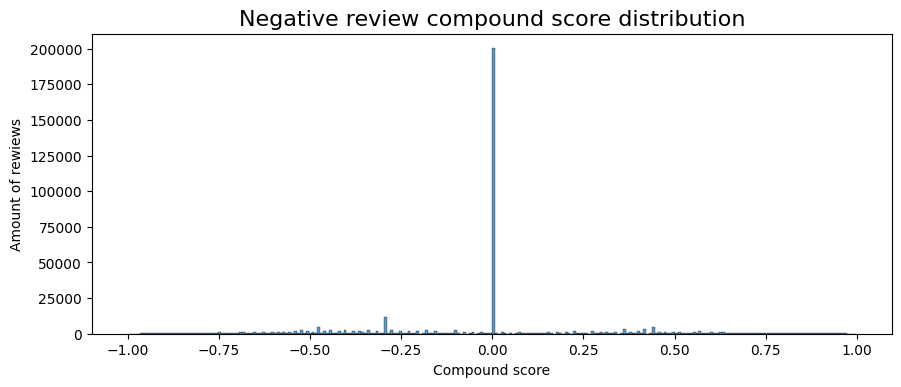

In [127]:
fig = plt.figure(figsize=(8, 3))
axes = fig.add_axes((1, 1, 1, 1))

histplot = sns.histplot(
    data = hotels,
    x='negative_review_com', 
    bins=250,
    ax=axes,
)
histplot.set_title('Negative review compound score distribution', fontsize=16)
histplot.set_xlabel('Compound score')
histplot.set_ylabel('Amount of rewiews')

In [130]:
hotels['negative_review_neg'] = hotels['negative_review_sl'].apply(negneg_func)

Text(0, 0.5, 'Amount of rewiews')

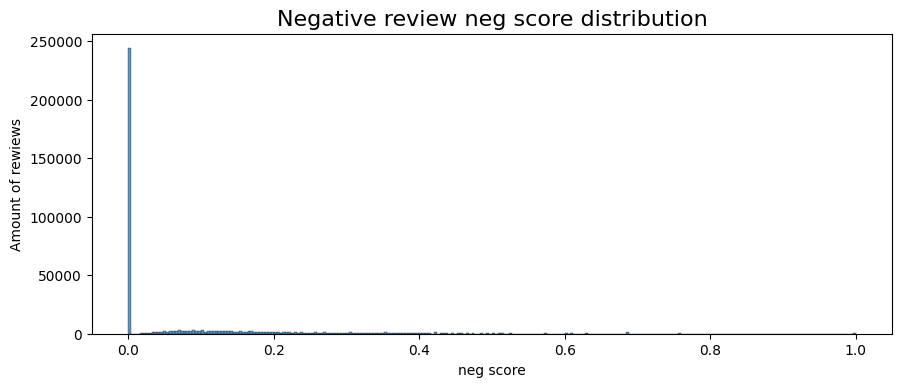

In [131]:
fig = plt.figure(figsize=(8, 3))
axes = fig.add_axes((1, 1, 1, 1))

histplot = sns.histplot(
    data = hotels,
    x='negative_review_neg', 
    bins=250,
    ax=axes,
)
histplot.set_title('Negative review neg score distribution', fontsize=16)
histplot.set_xlabel('neg score')
histplot.set_ylabel('Amount of rewiews')

In [132]:
def pos_func(input_string):
    """Function to evaluate positive review

    Args:
        input_string (string): Positive review text

    Returns:
        float: Review score (compound)
    """
    if input_string in no_positive_list:
        return 0
    else:
        review_analyser = SentimentIntensityAnalyzer()
        review_scores = review_analyser.polarity_scores(input_string)
        return review_scores['compound']

In [133]:
def pospos_func(input_string):
    """Function to evaluate positive review

    Args:
        input_string (string): Positive review text

    Returns:
        float: Review score (pos)
    """
    if input_string in no_positive_list:
        return 0
    else:
        review_analyser = SentimentIntensityAnalyzer()
        review_scores = review_analyser.polarity_scores(input_string)
        return review_scores['pos']

In [134]:
hotels['positive_review_com'] = hotels['positive_review_sl'].apply(pos_func)

Text(0, 0.5, 'Amount of rewiews')

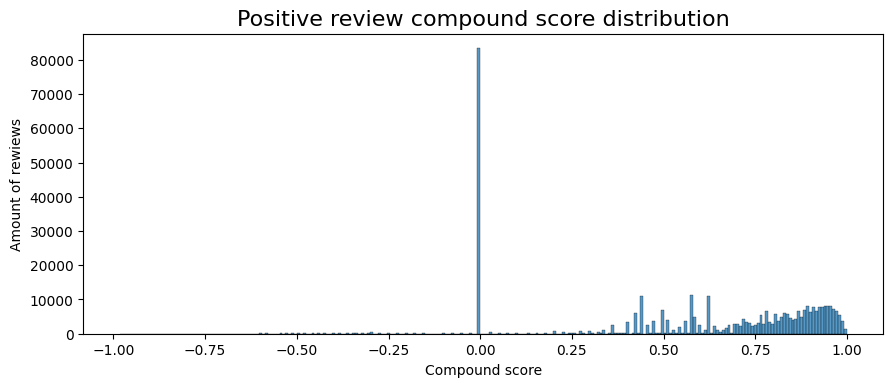

In [135]:
fig = plt.figure(figsize=(8, 3))
axes = fig.add_axes((1, 1, 1, 1))

histplot = sns.histplot(
    data = hotels,
    x='positive_review_com', 
    bins=250,
    ax=axes,
)
histplot.set_title('Positive review compound score distribution', fontsize=16)
histplot.set_xlabel('Compound score')
histplot.set_ylabel('Amount of rewiews')

In [136]:
hotels['positive_review_pos'] = hotels['positive_review_sl'].apply(pospos_func)

Text(0, 0.5, 'Amount of rewiews')

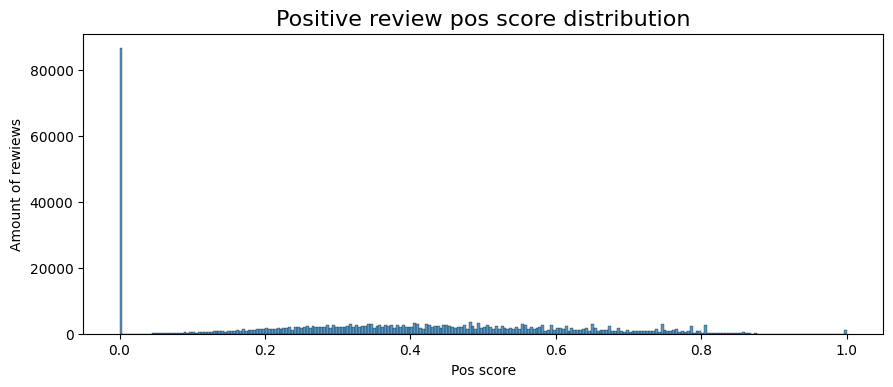

In [137]:
fig = plt.figure(figsize=(8, 3))
axes = fig.add_axes((1, 1, 1, 1))

histplot = sns.histplot(
    data = hotels,
    x='positive_review_pos', 
    bins=250,
    ax=axes,
)
histplot.set_title('Positive review pos score distribution', fontsize=16)
histplot.set_xlabel('Pos score')
histplot.set_ylabel('Amount of rewiews')

As far as we are adding artificial zeros into our estimation, we can`t use normalized "compound" value. We can see it clearly in the graphs.   

Artificial anomaly must be one-sided. After normalization, zero-values are going into the middle of interval, ruining our starting idea.   

By the way, let`s check significance of calculated values.

<AxesSubplot: >

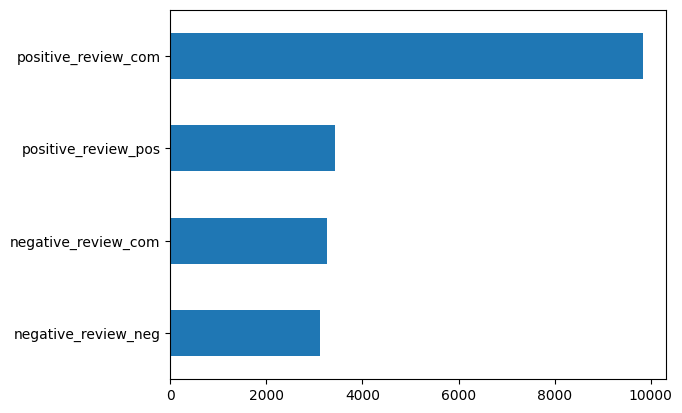

In [157]:
y = hotels['reviewer_score']
y = y.astype('int')

val_columns = ['negative_review_com', 'negative_review_neg', 'positive_review_com', 'positive_review_pos']

imp_num = pd.Series(f_classif(hotels[val_columns], y)[0], index = val_columns)
imp_num.sort_values(inplace = True)
imp_num.plot(kind = 'barh')

Nothing strange about this result - if we take ander consideration that we filled compound scores with zeros.   
Let`s remove them.

<AxesSubplot: >

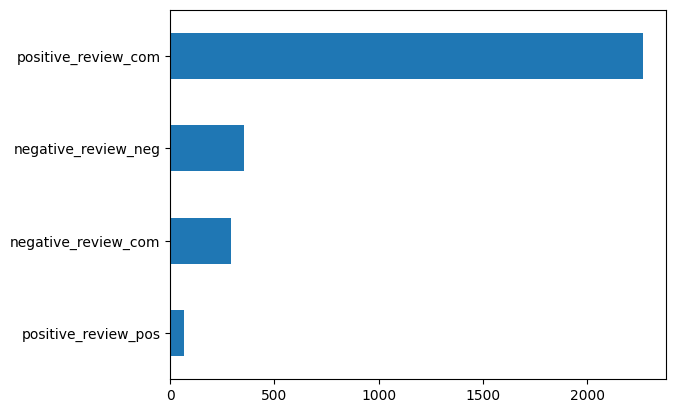

In [159]:
mask_zeros = (hotels['negative_review_com'] != 0) & (hotels['negative_review_neg'] != 0) & (hotels['positive_review_com'] != 0) & (hotels['positive_review_pos'] != 0)

y = hotels[mask_zeros]['reviewer_score']
y = y.astype('int')

val_columns = ['negative_review_com', 'negative_review_neg', 'positive_review_com', 'positive_review_pos']

imp_num = pd.Series(f_classif(hotels[mask_zeros][val_columns], y)[0], index = val_columns)
imp_num.sort_values(inplace = True)
imp_num.plot(kind = 'barh')

The idea was wrong - compound values are better at any meaning.

In [160]:
columns_to_drop.extend(['negative_review', 'negative_review_sl', 'negative_review_sl1', 'negative_review_neg', 'positive_review', 'positive_review_sl', 'positive_review_pos'])

#### 3.8 Encoding categories

In [163]:
cat_columns

['review_day', 'hotel_descripton', 'hotel_city', 'rev_nation_short']

review_day - 7 values, one hot encoder   
hotel_descripton - 1494 values, binary encoder   
hotel_city - 6 values, one hot encoder   
rev_nation_short - 51 values, binary encoder   

In [165]:
encoder_oh = ce.OneHotEncoder(cols=['review_day', 'hotel_city'])
hotels_oh = encoder_oh.fit_transform(hotels[['review_day', 'hotel_city']]).astype('bool')
hotels = hotels.join(
    hotels_oh,
    how = 'left'
)

In [169]:
encoder_bin = ce.BinaryEncoder()
hotels_bin = encoder_bin.fit_transform(hotels[['hotel_descripton', 'rev_nation_short']]).astype('bool')
hotels = hotels.join(
    hotels_bin,
    how = 'left'
)

After encoding is done, we could delete category columns.

In [171]:
columns_to_drop.extend(cat_columns)

#### 3.9 Cleanup

In [172]:
columns_to_drop

['days_since_review',
 'review_month',
 'review_date',
 'days_since_review_int',
 'hotel_address',
 'hotel_name',
 'reviewer_nationality',
 'tags',
 'lat',
 'lng',
 'negative_review',
 'negative_review_sl',
 'negative_review_sl1',
 'negative_review_neg',
 'positive_review',
 'positive_review_sl',
 'positive_review_pos',
 'review_day',
 'hotel_descripton',
 'hotel_city',
 'rev_nation_short']

In [173]:
hotels.drop(columns_to_drop, axis = 1, inplace = True)

#### Correlation

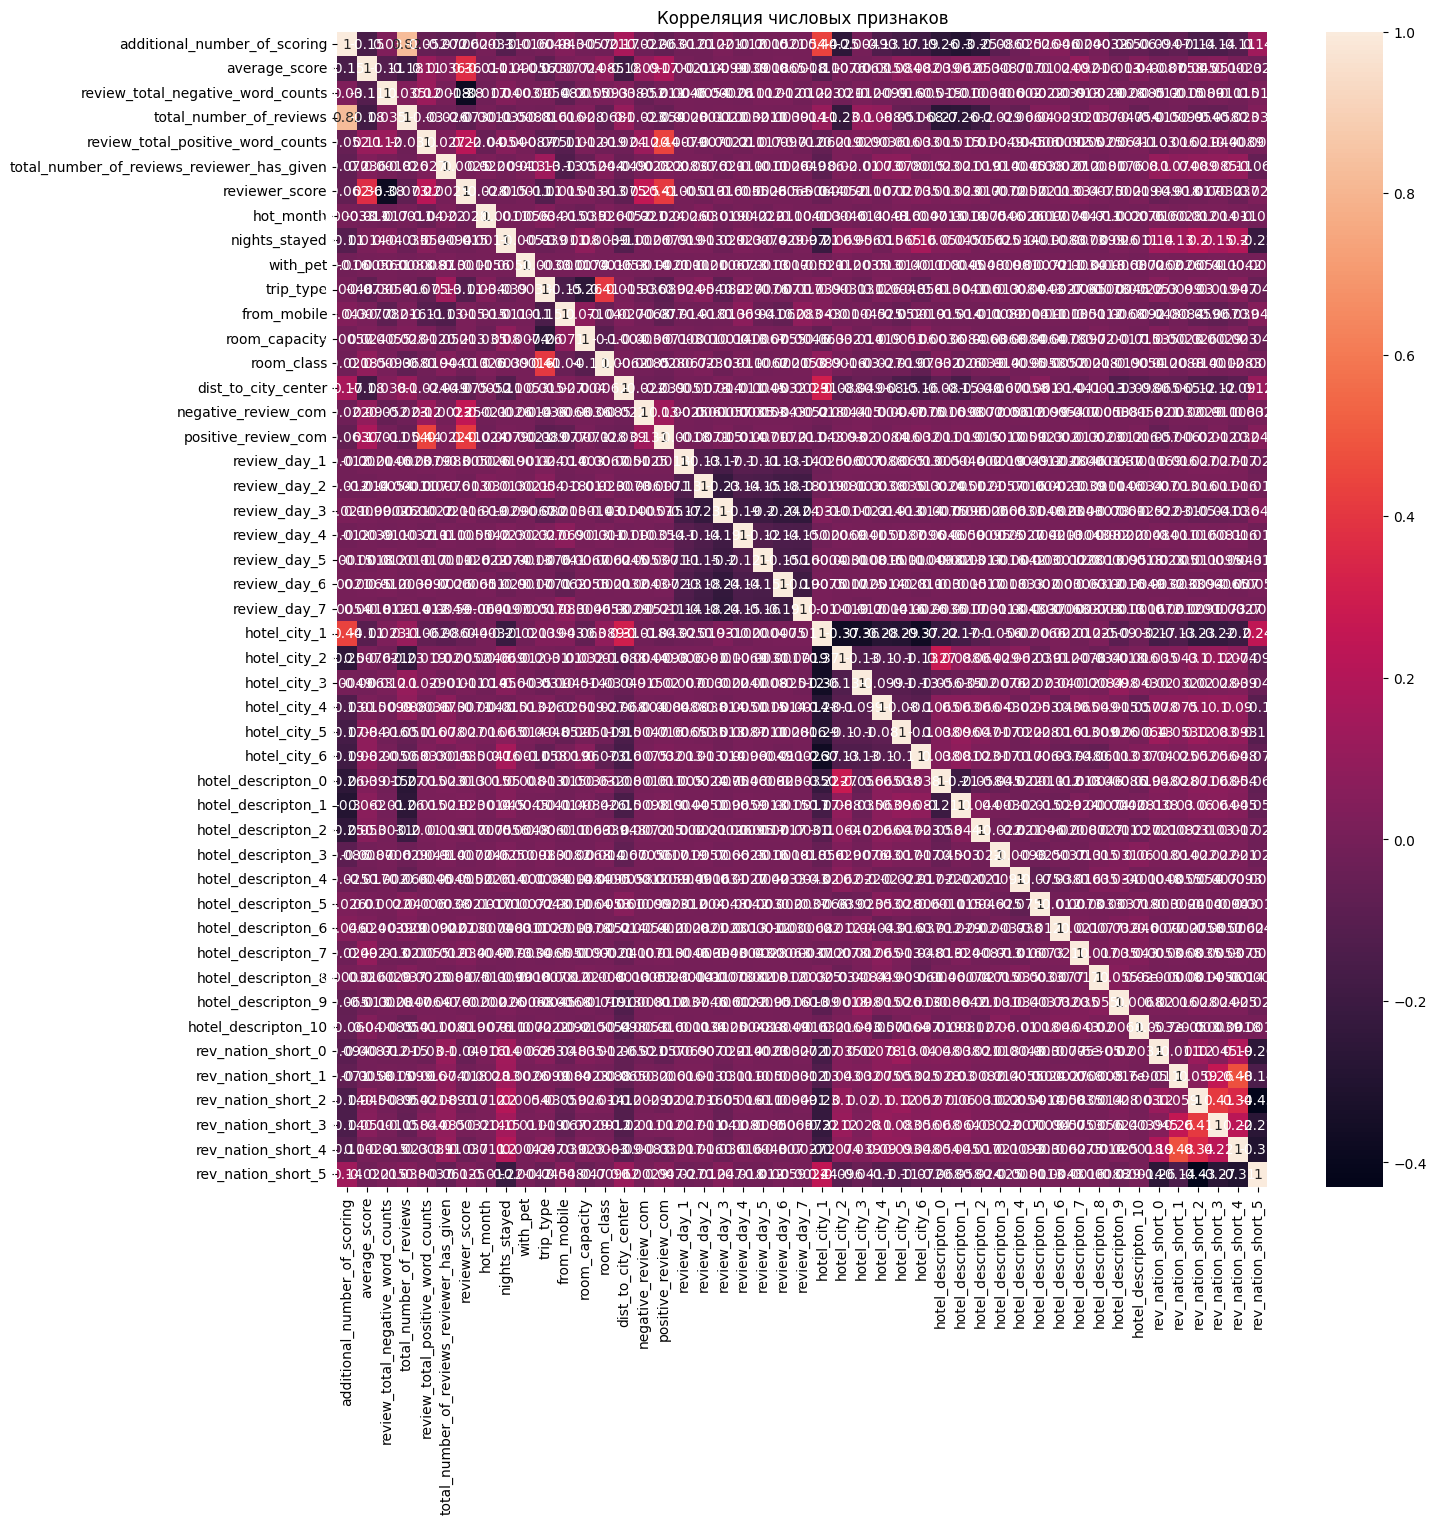

In [175]:
fig = plt.figure(figsize=(15, 15))

ax = sns.heatmap(hotels.corr(), annot = True)
ax.set_title("Корреляция числовых признаков")
plt.xticks(rotation = 90)

plt.show()

In [ ]:
# # убираем признаки которые еще не успели обработать, 
# # модель на признаках с dtypes "object" обучаться не будет, просто выберим их и удалим
object_columns = [s for s in hotels.columns if hotels[s].dtypes == 'object']
hotels.drop(object_columns, axis = 1, inplace=True)

In [177]:
# Разбиваем датафрейм на части, необходимые для обучения и тестирования модели  
# Х - данные с информацией об отелях, у - целевая переменная (рейтинги отелей)  
X = hotels.drop(['reviewer_score'], axis = 1)  
y = hotels['reviewer_score'] 

In [178]:
# Наборы данных с меткой "train" будут использоваться для обучения модели, "test" - для тестирования.  
# Для тестирования мы будем использовать 25% от исходного датасета.  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [179]:
# Создаём модель  
regr = RandomForestRegressor(n_estimators=100)  
      
# Обучаем модель на тестовом наборе данных  
regr.fit(X_train, y_train)  
      
# Используем обученную модель для предсказания рейтинга отелей в тестовой выборке.  
# Предсказанные значения записываем в переменную y_pred  
y_pred = regr.predict(X_test)  


In [180]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они отличаются  
# Метрика называется Mean Absolute Percentage Error (MAPE) и показывает среднюю абсолютную процентную ошибку предсказанных значений от фактических.  
print('MAPE:', metrics.mean_absolute_percentage_error(y_test, y_pred))

MAPE: 0.12584885846983068


<AxesSubplot: >

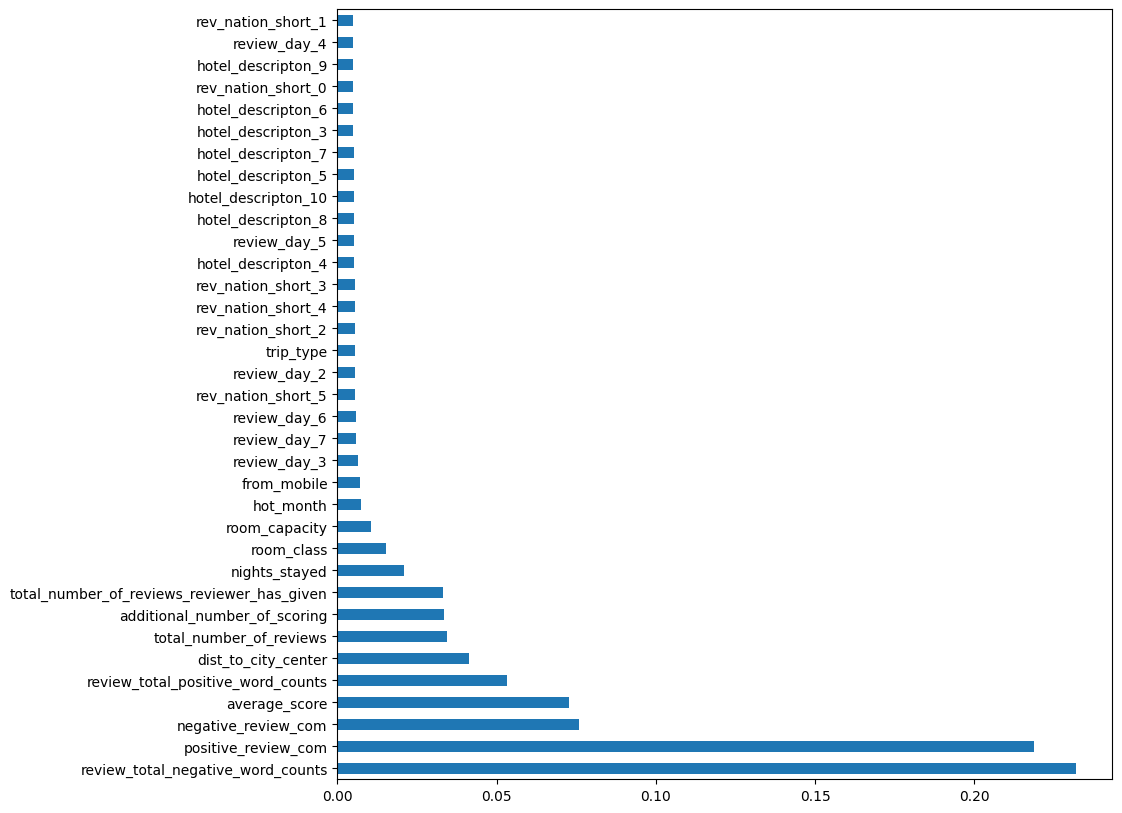

In [183]:
# в RandomForestRegressor есть возможность вывести самые важные признаки для модели
plt.rcParams['figure.figsize'] = (10,10)
feat_importances = pd.Series(regr.feature_importances_, index=X.columns)
feat_importances.nlargest(35).plot(kind='barh')